In [1]:
!pip install gradio selenium beautifulsoup4 nltk matplotlib

^C


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     ---------------------------------------- 51.6/51.6 kB ? eta 0:00:00
     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     -------------------------------------- 125.2/125.2 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
    --------------------------------------- 0.3/12.4 MB 9.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/12.4 MB 8.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.4 MB 8.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/12.4 MB 7.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/12.4 MB 7.4 MB/s eta 0:00:02



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:

# Load and analyze keywords for ICRA 2023
titles_2023 = load_titles_from_csv('ICRA-2023.csv')
keywords_2023 = analyze_keywords(titles_2023)
print("Top Keywords for ICRA 2023:")
print(keywords_2023)

# Load and analyze keywords for ICRA 2024
titles_2024 = load_titles_from_csv('ICRA-2024.csv')
keywords_2024 = analyze_keywords(titles_2024)
print("\nTop Keywords for ICRA 2024:")
print(keywords_2024)


Top Keywords for ICRA 2023:
[('learning', 257), ('using', 180), ('robot', 176), ('control', 172), ('robotic', 127), ('planning', 122), ('via', 107), ('robots', 98), ('estimation', 93), ('based', 93), ('object', 93), ('motion', 90), ('manipulation', 88), ('autonomous', 80), ('detection', 76), ('reinforcement', 75), ('navigation', 69), ('environments', 65), ('visual', 64), ('dynamic', 63), ('model', 57), ('robust', 55), ('soft', 54), ('trajectory', 54), ('tracking', 53), ('optimization', 53), ('deep', 53), ('localization', 51), ('design', 50), ('point', 47), ('pose', 47), ('neural', 47), ('efficient', 46), ('system', 46), ('framework', 45), ('adaptive', 42), ('locomotion', 41), ('approach', 41), ('objects', 40), ('human', 39), ('segmentation', 39), ('aerial', 38), ('prediction', 35), ('active', 34), ('lidar', 34), ('optimal', 34), ('towards', 34), ('driving', 33), ('sensing', 33), ('path', 32)]

Top Keywords for ICRA 2024:
[('learning', 353), ('robot', 270), ('control', 261), ('using', 2

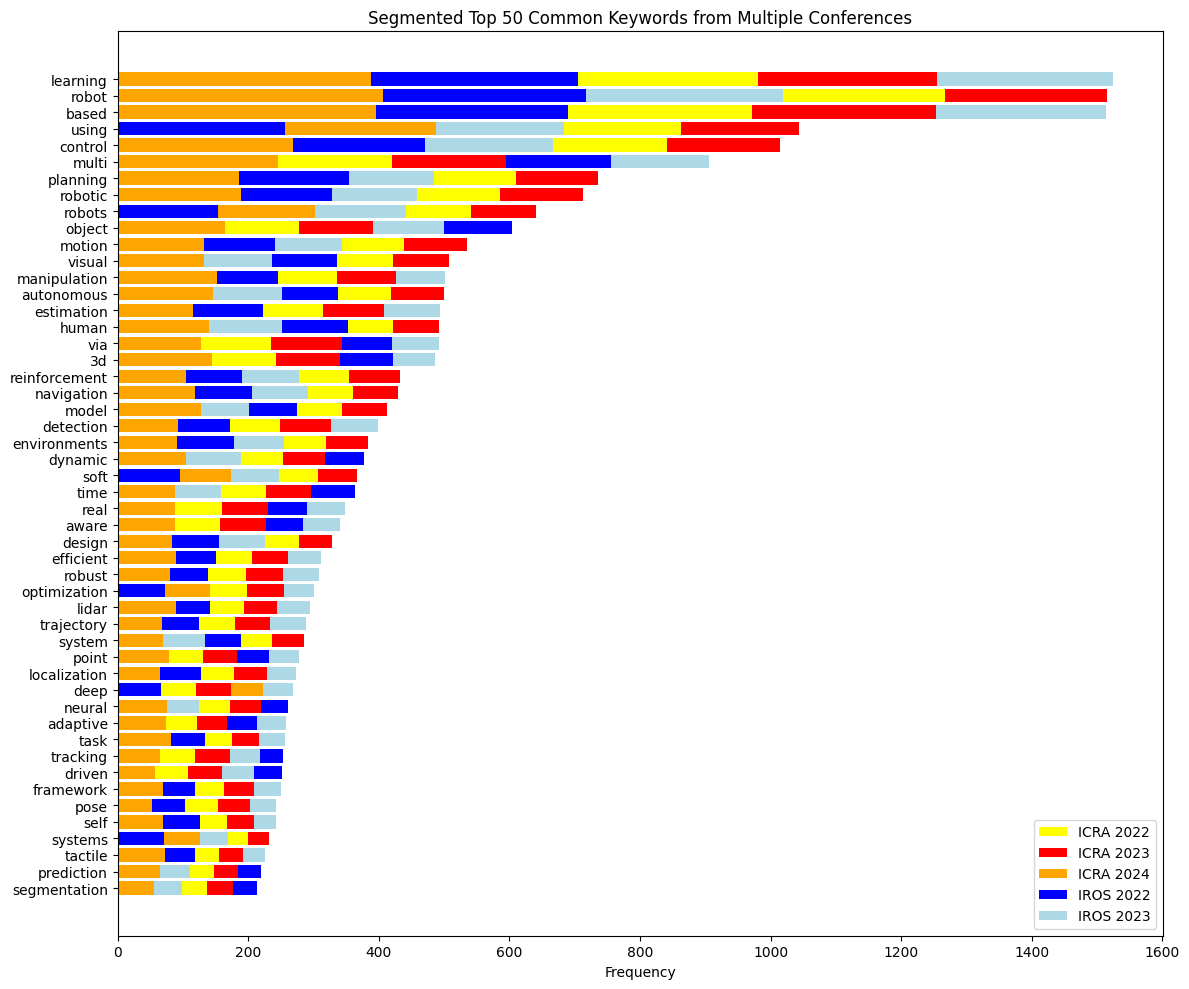

In [36]:
def plot_keywords(keywords_data):
    colors = {
        'ICRA 2023': 'red',
        'ICRA 2024': 'orange',
        'IROS 2022': 'blue',
        'IROS 2023': 'lightblue',
        'IROS 2024': 'purple',
        'ICRA 2022': 'yellow'
    }

    # Prepare the data for plotting
    data_for_plotting = defaultdict(lambda: defaultdict(int))
    for label, keywords in keywords_data.items():
        for word, count in keywords.items():
            data_for_plotting[word][label] += count

    # Sorting words by the total counts across all datasets
    sorted_words = sorted(data_for_plotting, key=lambda x: sum(data_for_plotting[x].values()), reverse=True)[:50]

    fig, ax = plt.subplots(figsize=(12, 10))
    y_positions = range(len(sorted_words))

    # Prepare legend handling
    legend_handles = {}

    # Plotting data
    for idx, word in enumerate(sorted_words):
        left = 0  # start each word's bar segments from zero on the x-axis
        for conference in sorted(data_for_plotting[word], key=lambda x: data_for_plotting[word][x], reverse=True):
            count = data_for_plotting[word][conference]
            handle = ax.barh(y_positions[idx], count, left=left, color=colors[conference], label=conference if conference not in legend_handles else "")
            left += count
            if conference not in legend_handles:
                legend_handles[conference] = handle

    ax.set_yticks(y_positions)
    ax.set_yticklabels(sorted_words)
    ax.set_xlabel('Frequency')
    ax.set_title('Segmented Top 50 Common Keywords from Multiple Conferences')
    # Using handles from the dictionary to ensure uniqueness
    ax.legend(handles=[legend_handles[conf] for conf in sorted(legend_handles)])
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Example data loading and plotting
icra_2022_keywords = analyze_keywords(load_titles_from_csv('ICRA-2022.csv'))
icra_2023_keywords = analyze_keywords(load_titles_from_csv('ICRA-2023.csv'))
icra_2024_keywords = analyze_keywords(load_titles_from_csv('ICRA-2024.csv'))
iros_2022_keywords = analyze_keywords(load_titles_from_csv('IROS-2022.csv'))
iros_2023_keywords = analyze_keywords(load_titles_from_csv('IROS-2023.csv'))

keywords_data = {
    'ICRA 2022': icra_2023_keywords,
    'ICRA 2023': icra_2023_keywords,
    'ICRA 2024': icra_2024_keywords,
    'IROS 2022': iros_2022_keywords,
    'IROS 2023': iros_2023_keywords
}

plot_keywords(keywords_data)


In [49]:
import pandas as pd
from collections import Counter, defaultdict
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import gradio as gr

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load titles from CSV
def load_titles_from_csv(file_path):
    df = pd.read_csv(file_path, header=None)
    return df[0].tolist()

# Analyze keywords in the titles
def analyze_keywords(titles):
    words = []
    stop_words = set(stopwords.words('english'))
    for title in titles:
        tokens = word_tokenize(title.lower())
        words.extend([word for word in tokens if word.isalpha() and word not in stop_words])
    return Counter(words)

# Plot keywords function as defined previously
def plot_keywords(keywords_data):
    colors = {
        'ICRA 2023': 'red',
        'ICRA 2024': 'orange',
        'IROS 2022': 'blue',
        'IROS 2023': 'lightblue',
        'IROS 2024': 'purple',
        'ICRA 2022': 'yellow'
    }

    data_for_plotting = defaultdict(lambda: defaultdict(int))
    for label, keywords in keywords_data.items():
        for word, count in keywords.items():
            data_for_plotting[word][label] += count

    sorted_words = sorted(data_for_plotting, key=lambda x: sum(data_for_plotting[x].values()), reverse=True)[:50]
    fig, ax = plt.subplots(figsize=(12, 10))
    y_positions = range(len(sorted_words))

    legend_handles = {}
    for idx, word in enumerate(sorted_words):
        left = 0
        for conference in sorted(data_for_plotting[word], key=lambda x: data_for_plotting[word][x], reverse=True):
            count = data_for_plotting[word][conference]
            handle = ax.barh(y_positions[idx], count, left=left, color=colors[conference], label=conference if conference not in legend_handles else "")
            left += count
            if conference not in legend_handles:
                legend_handles[conference] = handle

    ax.set_yticks(y_positions)
    ax.set_yticklabels(sorted_words)
    ax.set_xlabel('Frequency')
    ax.set_title('Segmented Top 50 Common Keywords from Multiple Conferences')
    ax.legend(handles=[legend_handles[conf] for conf in sorted(legend_handles)])
    plt.tight_layout()
    plt.gca().invert_yaxis()

    return plt

# Set up Gradio interface
def process_selection(selected_combinations):
    # Define paths to your CSV files
    file_paths = {
        "ICRA 2022": "ICRA-2022.csv",
        "ICRA 2023": "ICRA-2023.csv",
        "ICRA 2024": "ICRA-2024.csv",
        "IROS 2022": "IROS-2022.csv",
        "IROS 2023": "IROS-2023.csv",
      #  "IROS 2024": "IROS-2024.csv"
    }

    keywords_data = {}
    for combo in selected_combinations:
        titles = load_titles_from_csv(file_paths[combo])
        keywords = analyze_keywords(titles)
        keywords_data[combo] = keywords

    fig = plot_keywords(keywords_data)
    return fig

with gr.Blocks() as app:
    with gr.Row():
        selection = gr.CheckboxGroup(
            label="Select Conference-Year",
            choices=["ICRA 2022", "ICRA 2023", "ICRA 2024", "IROS 2022", "IROS 2023"] #IROS 2024 to be added later
        )
        submit_button = gr.Button("Generate Plot")

    plot_output = gr.Plot()

    submit_button.click(
        fn=process_selection,
        inputs=selection,
        outputs=plot_output
    )

app.launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://830511288239fc115e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
